# Gaussianness
****

In [1]:
import corner
from dynesty import NestedSampler, utils
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

In [2]:
#%matplotlib notebook
π = np.pi
Colour = plt.style.use('tableau-colorblind10')

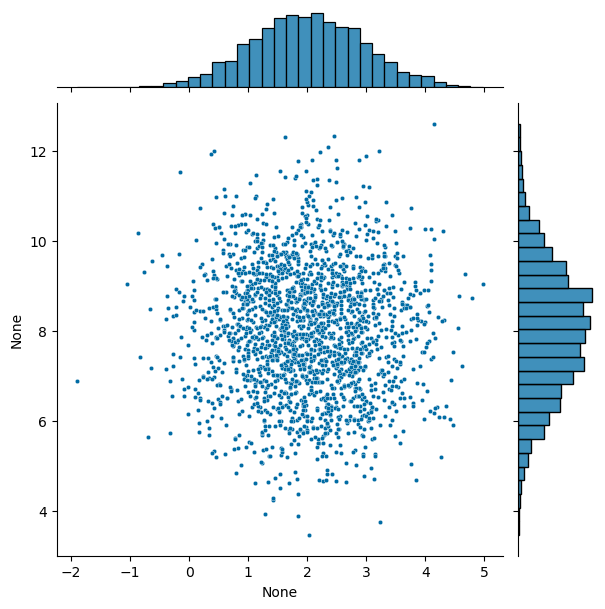

In [32]:
μ = [2, 8]
σ = [1, 2]
Σ = np.diag(σ)
No = [1200, 2000]
Mix = No[1]/(No[0]+No[1])
Data = np.random.multivariate_normal(μ, Σ, No[1])

g = sns.jointplot(x=Data[:,0], y=Data[:,1], joint_kws={'s': 10})

In [4]:
def Model(x, p):
    
    return p

def logLikelihood(p, x):
    p = Model(x, p)
    μ1, σ1, μ2, σ2, Mix = p
    logPDF1 = norm.logpdf(x, loc=μ1, scale=σ1) + np.log(1-Mix)
    logPDF2 = norm.logpdf(x, loc=μ2, scale=σ2) + np.log(Mix)
    logPDF = np.logaddexp(logPDF1, logPDF2)
    
    return sum(logPDF)

Busy life, moving on

In [5]:
def UltraMagnus(u):
    x = np.array(u)
    x[0] = 12*x[0]
    x[1] = 4*x[1] + 0.2
    x[2] = 12*x[2]
    x[3] = 4*x[3] + 0.2
    
    return x

In [6]:
Sampler = NestedSampler(logLikelihood, UltraMagnus, ndim=5, logl_args=[Data], nlive=2000)

Sampler.run_nested()

Results = Sampler.results

34374it [03:31, 162.29it/s, +2000 | bound: 35 | nc: 1 | ncall: 177932 | eff(%): 20.675 | loglstar:   -inf < -2875.469 <    inf | logz: -2893.621 +/-  0.123 | dlogz:  0.001 >  2.009]


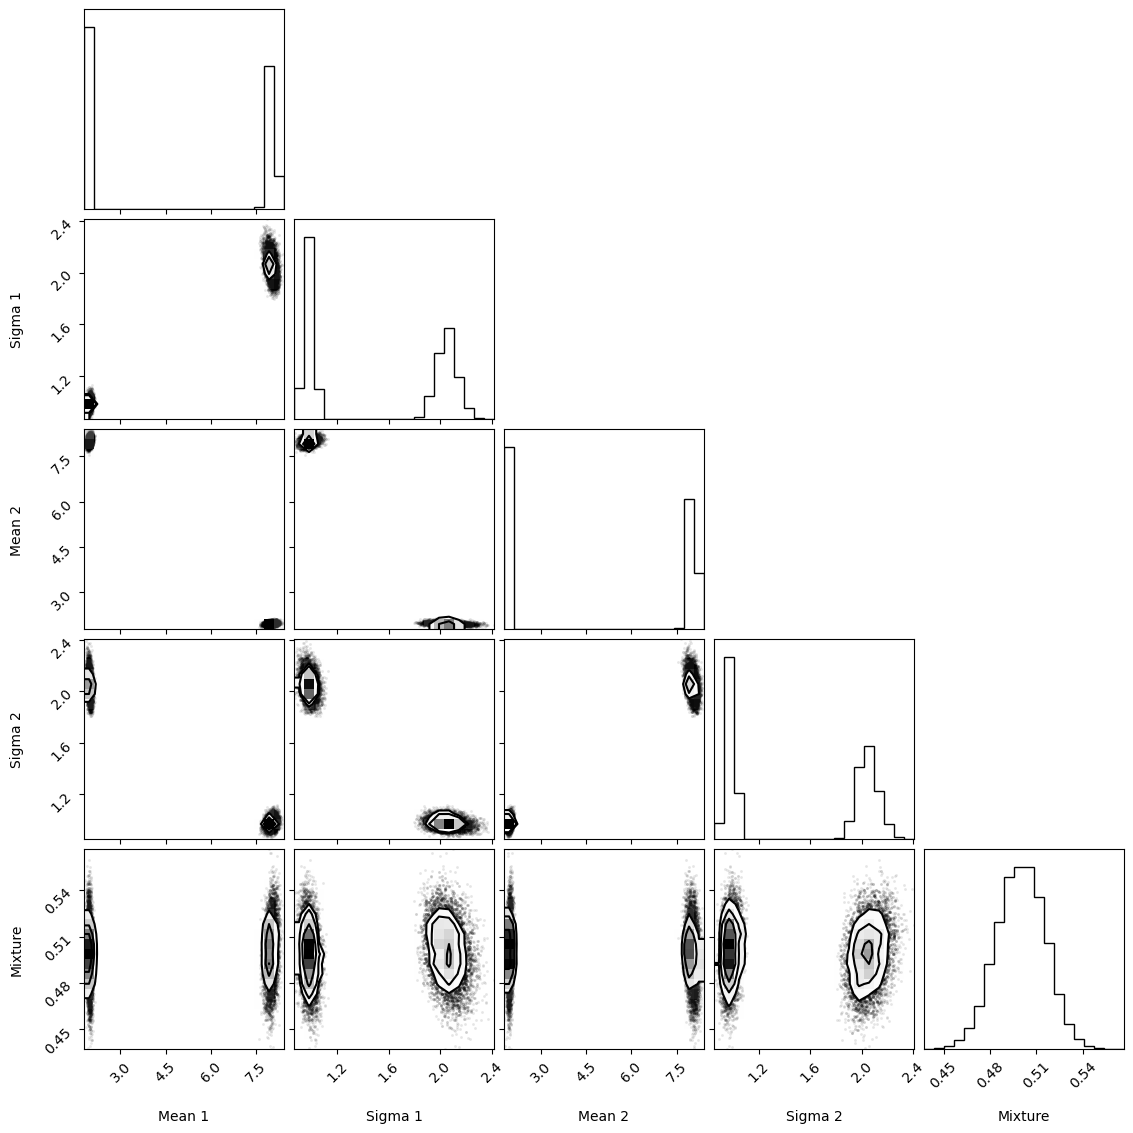

In [7]:
Samples = Results.samples_equal()
corner.corner(Samples, labels=['Mean 1', 'Sigma 1', 'Mean 2', 'Sigma 2', 'Mixture'],
              true_values=[μ[0], σ[0], μ[1], σ[1], Mix]);

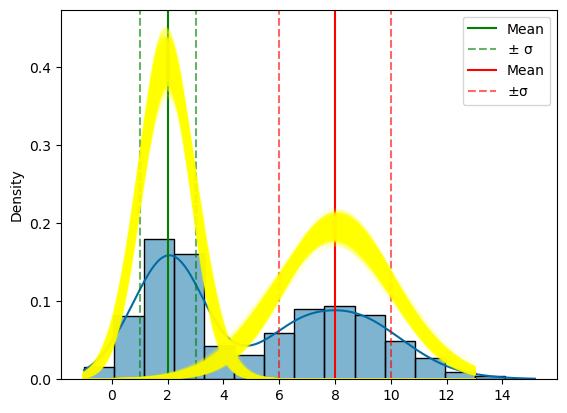

In [8]:
ax = sns.histplot(Data, kde=True, stat='density')
ax.axvline(μ[0], color='green', label='Mean')
ax.axvline(μ[0]+σ[0], color='green', linestyle='--', label='$\pm$ σ', alpha=0.6)
ax.axvline(μ[0]-σ[0], color='green', linestyle='--', alpha=0.6)

ax.axvline(μ[1], color='red', label='Mean')
ax.axvline(μ[1]+σ[1], color='red', linestyle='--', label='$\pm$σ', alpha=0.6)
ax.axvline(μ[1]-σ[1], color='red', linestyle='--', alpha=0.6)

Fuzz = np.linspace(-1, 13, No[1])
for f in Samples[::10]:
    plt.plot(Fuzz, norm.pdf(Fuzz, f[0], f[1]), color='yellow', alpha=0.1)
    
ax.legend()